# Aliasgartaksali Human vs Non-Human Dataset

In [13]:
import os
DATASET_ROOT = os.path.join(
    os.path.dirname(os.curdir), 
    'versions',
    '1',
    'human-and-non-human'
)
TRAINING_PATH = os.path.join(
    DATASET_ROOT, 
    'training_set',
    'training_set'
)
TEST_PATH = os.path.join(
    DATASET_ROOT, 
    'test_set',
    'test_set'
)
import sys
AI_MODEL_PATH = os.path.abspath(os.path.join(os.path.curdir, os.pardir, os.pardir, os.pardir))
sys.path.append(AI_MODEL_PATH)

In [14]:
# Extract Unique Classes
unique_classes = list(set(os.listdir(TRAINING_PATH) + os.listdir(TEST_PATH)))
unique_classes

['non-humans', 'humans']

In [29]:
import matplotlib.pyplot as plt
from image_preprocessing import visualize_image, encode_labels, decode_labels, preprocess
import numpy as np
from skimage.transform import resize
import pickle

Extracting Raw Training Data
Before Processing...


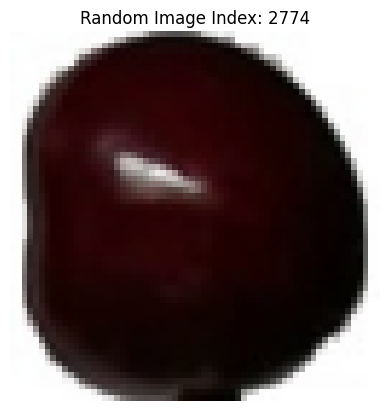

Extracting Raw Test Data
Before Processing...


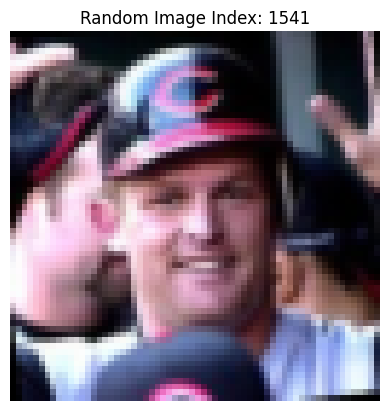

In [16]:
# Extract Raw Images
X_train = []
y_train = []
X_test = []
y_test = []

random_index_visualize: int = None
image_shape = (64, 64, 3) # RGB

# Training Data
print('Extracting Raw Training Data')
for index, class_name in enumerate(unique_classes):
    for imageName in os.listdir(os.path.join(TRAINING_PATH, class_name)):
        if not imageName.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            continue
        image = plt.imread(os.path.join(TRAINING_PATH, class_name, imageName))
        image = resize(image, image_shape, anti_aliasing=True)
        X_train.append(image)
        y_train.append(class_name)
print('Before Processing...')
visualize_image(np.array(X_train))

# Testing Data
print('Extracting Raw Test Data')
for index, class_name in enumerate(unique_classes):
    for imageName in os.listdir(os.path.join(TEST_PATH, class_name)):
        if not imageName.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            continue
        image = plt.imread(os.path.join(TEST_PATH, class_name, imageName))
        image = resize(image, image_shape, anti_aliasing=True)
        X_test.append(image)
        y_test.append(class_name)
print('Before Processing...')
visualize_image(np.array(X_test))

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# Encode Labels
encoded_y_train, encoderTrain = encode_labels(y_train)
encoded_y_test, encoderTest = encode_labels(y_test)
# Check Encoding
assert set(np.array(decode_labels(encoded_y_train, encoderTrain))) == set(unique_classes)
# Check Shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")
assert X_train.shape[0] == encoded_y_train.shape[0]
assert X_test.shape[0] == encoded_y_test.shape[0]

Training Data Shape: (8017, 64, 64, 3)
Test Data Shape: (2723, 64, 64, 3)


Looks like there are 8017 images in the training set and 2723 images in the test set, with images in 64 x 64 pixels in RGB.

Processing Raw Training Data
After Processing...


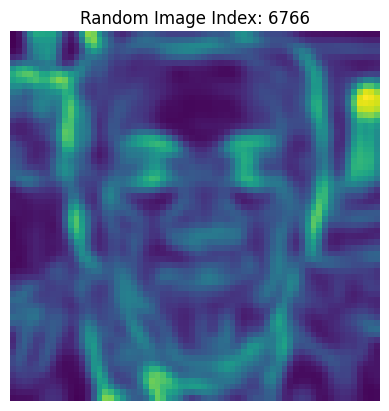

Processing Raw Test Data
After Processing...


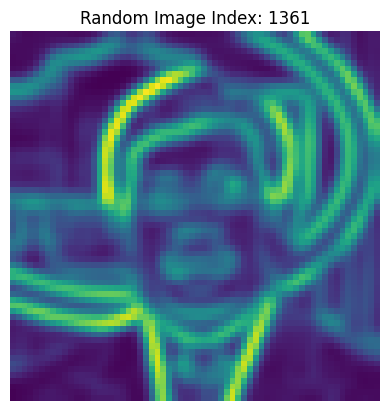

In [25]:
X_train_processed = []
X_test_processed = []

# Process the Images
# Training Data
print('Processing Raw Training Data')
for index, image in enumerate(X_train):
    processed_image = preprocess(
        img_array=image,
        isCurrentGrayScale=False
    )
    X_train_processed.append(processed_image)
print('After Processing...')
visualize_image(np.array(X_train_processed))

# Process the Images
# Test Data
print('Processing Raw Test Data')
for index, image in enumerate(X_test):
    processed_image = preprocess(
        img_array=image,
        isCurrentGrayScale=False
    )
    X_test_processed.append(processed_image)
print('After Processing...')
visualize_image(np.array(X_test_processed))

In [26]:
assert len(X_train_processed) == len(X_train) == len(y_train)
assert len(X_test_processed) == len(X_test) == len(y_test)

In [27]:
# Convert to Numpy
X_train_processed = np.array(X_train_processed)
X_test_processed = np.array(X_test_processed)

In [28]:
print(f"Shape of Processed Set: {X_train_processed.shape}")
print(f"Shape of Processed Set: {X_test_processed.shape}")

Shape of Processed Set: (8017, 64, 64)
Shape of Processed Set: (2723, 64, 64)


In [31]:
# Save the Data
if (not os.path.exists('features')):
    os.mkdir('features')
if (not os.path.exists('labels')):
    os.mkdir('labels')
np.save('features/X_train.npy', X_train_processed)
np.save('labels/y_train.npy', encoded_y_train)
np.save('features/X_test.npy', X_test_processed)
np.save('labels/y_test.npy', encoded_y_test)
with open('encoderTrain.pkl', 'wb') as f:
    pickle.dump(encoderTrain, f)
with open('encoderTest.pkl', 'wb') as f:
    pickle.dump(encoderTest, f)
print('Data Saved Successfully')

Data Saved Successfully
